## Business Problem:

Microsoft has recognized the trend of major companies venturing into original video content creation and wants to join the bandwagon. They've envisioned establishing a new movie studio but lack expertise in this domain.The project investigates the current landscape of successful films at the movie industry. The findings will be pivotal in guiding the head of Microsoft's new movie studio in determining types of films to focus on.

### Objectives:

### 1: Audience Preferences

Understanding audience preferences is crucial. Analysis reveals a strong inclination towards franchises, adaptations, and sequels. Therefore, Microsoft should explore opportunities for acquiring rights to popular franchises or developing sequels to successful films to align with audience preferences and maximize profitability.

### 2: Strategic Collaborations

Collaboration with established directors, producers, or production companies can significantly enhance the success potential of Microsoft's movie ventures. Data highlights the importance of experienced professionals in driving box office success. Thus, Microsoft should actively seek partnerships or acquisitions to leverage expertise in the movie industry and ensure the quality and success of their productions.

### 3: International Expansion and Global Appeal:

Recognizing the global nature of the movie industry, Microsoft should prioritize international markets to maximize profits. Tailoring content to resonate with diverse audiences across different regions, languages, and cultures can significantly enhance box office revenues. Investing in localization efforts, international distribution deals, and strategic release timing can ensure the widespread availability and appeal of their films, thereby unlocking new revenue streams and fostering sustainable growth on a global scale.

## Business Understanding:

This project serves as a strategic compass for Microsoft's foray into the movie industry. By analyzing current trends and audience preferences, we equip the stakeholders with actionable insights necessary for informed decision-making. The project's value lies in providing targeted recommendations tailored to the specific needs of Microsoft's new movie studio, thereby enabling them to navigate the competitive landscape effectively and maximize their chances of success.

## Introduction:

The project addresses the pressing need for Microsoft to establish its presence in the burgeoning realm of original video content creation. With major competitors already dominating the market, Microsoft aims to leverage data-driven insights to carve out its niche in the industry. The primary stakeholder, the head of Microsoft's new movie studio, will utilize the findings to formulate a strategic roadmap for initiating and sustaining successful movie productions.

## Conclusion:

In conclusion, the project delivers actionable recommendations derived from comprehensive data analysis, aimed at guiding Microsoft's entry into the movie industry. By aligning productions with prevailing market trends, understanding audience preferences, and fostering strategic collaborations, Microsoft can position itself for long-term success in the dynamic landscape of original content creation. This project not only addresses the immediate challenges faced by the stakeholders but also lays the foundation for future growth and innovation in the movie studio's endeavors.

In [3]:
# import necessary libraries

import numpy as npto 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Box Office Mojo
Box office Mojo is known for its extensive collection of box office data, which includes domestic and international revenues, how different studios sell both locally and internayionally.
The data from Box Office Mojo is from 2010 to 2018.
## Features
The main variables here are these data set are domestic and foreign gross, studio, movie title and year. 
## Goal 
We will mainly focus on both the domestic and international gross and analyze how Box office Mojo gets to sell both locally and internationally, and why they sell as much as they sell.
## Objectives
Import and clean the dataset.

Explore how Box Office Mojo is doing both internationally and locally.

Find out which market generates more money, whether domestic or foreign.

Explore the studios Box Office Mojo sell through, and find out the pattern within the studios.

Find out if domestic gross affects international gross or vice versa.

## Box office Mojo EDA
### Cleaning function
The project uses one main function that imports files from Box Office Mojo, cleans the data and returns the clean data. Incase there is more data from Box Office Mojo, the function accepts filepath as an argument.

In [9]:
# Function to read filepath as well as clean the file

def cleaning(file):
# read Box Office Mojo csv
    df = pd.read_csv(file)
# Changing data type of foreign_gross to numeric
    df["foreign_gross"] =(
        df["foreign_gross"]
        .str.replace(",", "")
        .astype(float)
    )
# removing outliers from domestic_gross
    dom_low, dom_high = df["domestic_gross"].quantile([0.3,0.7])
    dom_outliers = df["domestic_gross"].between(dom_low, dom_high)
    
# removing outliers from domestic_gross
    foreign_low, foreign_high = df["foreign_gross"].quantile([0.3,0.7])
    foreign_outliers = df["foreign_gross"].between(foreign_low, foreign_high)
    
# Put everything together
    df = (df[dom_outliers])
    df = (df.loc[foreign_outliers])

#   the function, return clean data 
    return df;

Box Office Mojo's first five records and their features include:

In [10]:
# Read file through funtion
bom = cleaning("data/bom.movie_gross.csv")
bom.head()

,title,studio,domestic_gross,foreign_gross,year
96,The Ghost Writer,Sum.,15500000.0,44700000.0,2010
110,Heartbreaker,IFC,504000.0,46900000.0,2010
114,The Girl Who Kicked the Hornet's Nest,MBox,5200000.0,38300000.0,2010
115,The Man From Nowhere,CJ,528000.0,42500000.0,2010
117,My Name is Khan,FoxS,4000000.0,38300000.0,2010


After cleaning. 
The dataset contains 349 records after cleaning and 5 columns where 2 of them are floats, 2 are strings, and one integer

In [11]:
bom.info()
# from this, we can see that the dtype of foreign_gross is an object
# we can also see a lot of null values from foreign gross

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349 entries, 96 to 3242
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           349 non-null    object 
 1   studio          349 non-null    object 
 2   domestic_gross  349 non-null    float64
 3   foreign_gross   349 non-null    float64
 4   year            349 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 16.4+ KB


In [12]:
bom[["foreign_gross", "domestic_gross"]].describe().round(1)
# clearly we can conclude that there are outliers here.

,foreign_gross,domestic_gross
count,349.0,349.0
mean,18112320.9,6097965.6
std,12663423.3,5593751.3
min,5300000.0,195000.0
25%,8500000.0,1100000.0
50%,13600000.0,3900000.0
75%,23200000.0,10700000.0
max,56100000.0,17700000.0


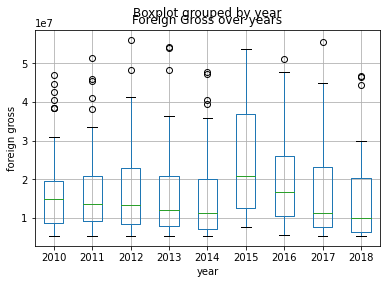

In [13]:
# visually finding outliers in the foreign_gross
ax = bom.boxplot(column="foreign_gross", by="year")
ax.set_ylabel("foreign gross")
ax.set_title("Foreign Gross over years");
# There are not so many outliers here compared to domestic_gross

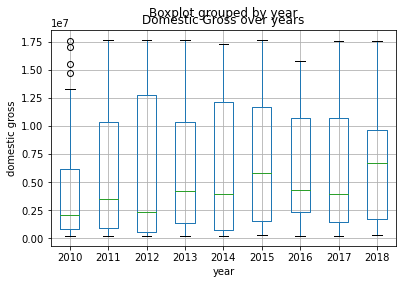

In [14]:
# visually finding outliers in the domestic_gross
ax = bom.boxplot(column="domestic_gross", by="year")
ax.set_ylabel("domestic gross")
ax.set_title("Domestic Gross over years");

In [15]:
bom["year"].value_counts()

2011    51
2010    44
2014    42
2012    40
2013    38
2016    37
2015    35
2018    33
2017    29
Name: year, dtype: int64

In 2010, Box office sold a total of 44 movies. In 2011, they sold 51 movies. 40 movies in 2012, 38 in 2013, 42 in 2014, 35 in 2015, 37 in 2016, 29 in 2017 and 33 movies in 2018.

Since we are mainly interested in the foreign and domestic gross, let's find out how big their difference is.

The difference between the average foreign gross and average domestic gross is:  12014355.29799427


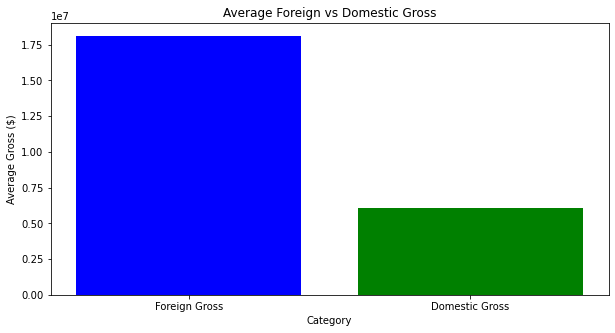

In [14]:
# bar graph showing difference between the average foreign gross and average domestic gross

avg_foreign_gross = bom['foreign_gross'].mean()
avg_domestic_gross = bom['domestic_gross'].mean()

# Data for plotting
categories = ['Foreign Gross', 'Domestic Gross']
averages = [avg_foreign_gross, avg_domestic_gross]

# Create the bar graph
plt.figure(figsize=(10, 5))
plt.bar(categories, averages, color=['blue', 'green'])

# Add titles and labels
plt.title('Average Foreign vs Domestic Gross')
plt.ylabel('Average Gross ($)')
plt.xlabel('Category')

print("The difference between the average foreign gross and average domestic gross is: ",avg_foreign_gross - avg_domestic_gross)

# Show the plot
plt.show();

The blue bar represents the average foreign gross, which reaches approximately $1.75 billion. This suggests that on average, films earn significantly more from foreign markets compared to domestic ones.
The green bar represents the average domestic gross, which is much shorter than the foreign gross bar, indicating a lower average movie sells in domestic markets.

Clearly there is very big difference on how Box Office Mojo sells internationally versus how their sells are locally.
### Recommendation
Microsoft should focus more on releasing internationally than domestically. According to Box Office Mojo, they gain exactly $ 12,014,355.3 more in foreign gross than in domestic gross.

In [23]:
bom["studio"].nunique()

78

In [24]:
bom["studio"].value_counts()

SPC      35
Wein.    25
FoxS     18
Focus    16
FIP      15
         ..
ParV      1
SV        1
JBG       1
FCW       1
Vari.     1
Name: studio, Length: 78, dtype: int64

Box office Mojo used 78 different studios to sell their movies both locally and internationally.

How well do these studios do in terms of domestic and foreign gross? The bar graphs below show how the studios perform, and Microsoft can know which studio to patner with in both foreign and local sells

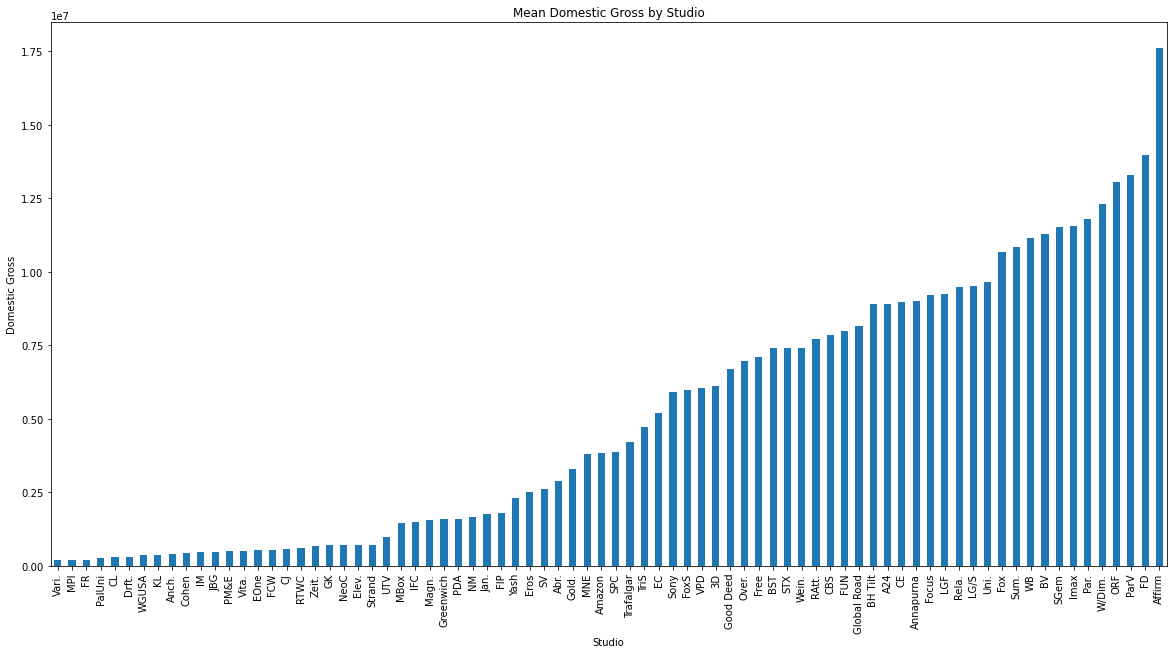

In [20]:
plt.figure(figsize=(20, 10))
mean_dom_gross_by_stu = (
    bom
    .groupby("studio")["domestic_gross"]
    .mean()
    .sort_values()
)
mean_dom_gross_by_stu.plot(
    kind = "bar",
    xlabel = "Studio",
    ylabel = "Domestic Gross",
    title = "Mean Domestic Gross by Studio"
);

In terms of Domestic gross, the following are the best performing studios: Affirm, FD, ParV, CRF, W/Dim Par, and Imax.

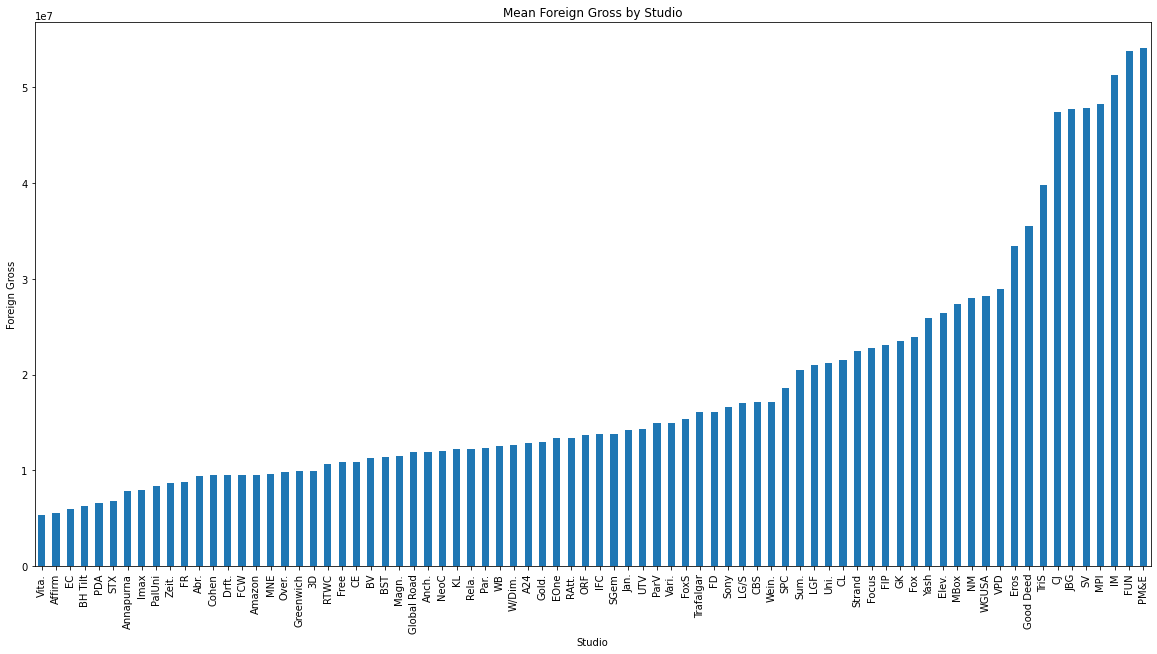

In [21]:
# Which studio has the highest domestic_gross

mean_foreign_gross_by_stu = (
    bom
    .groupby("studio")["foreign_gross"]
    .mean()
    .sort_values()
)
plt.figure(figsize=(20, 10))
mean_foreign_gross_by_stu.plot(
    kind = "bar",
    xlabel = "Studio",
    ylabel = "Foreign Gross",
    title = "Mean Foreign Gross by Studio"
);

In terms of Foreign gross, PMSE leads with over 5 billion dollars in foreign gross. Now, the studios with the highest foreign gross are the ones with the lowest domestic gross and vice versa.

### Recommendation
Microsoft should consider patnering with atleast 10 highest domestic gross generating studios and 10 highest foreign gross generating studio to gain a good advantage both locally and internationally.

In [24]:
# Does domestic gross affect foreign gross?

bom["foreign_gross"].corr(bom["domestic_gross"])

-0.01509821990448702

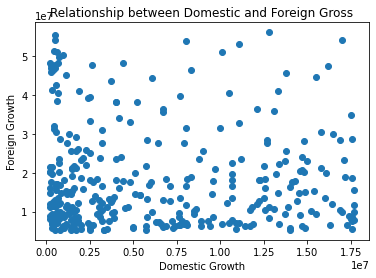

In [25]:
# Let's see this visually

plt.scatter(bom["domestic_gross"], bom["foreign_gross"])
plt.xlabel("Domestic Growth")
plt.ylabel("Foreign Growth")
plt.title("Relationship between Domestic and Foreign Gross");

Domestic gross doesn't influence foreign gross in any way. 
### Recommendation
Microsoft should focus on growing both global and local sells individually. These two markets are independent from each other.

## Conclusion
In order to do well in making movies, Microsoft needs to think carefully about how it approaches both the worldwide market and the local market. These markets work differently, so Microsoft should have separate plans to make the most money from each one.

Working with the best studios in the U.S. and around the world could be a big help. It means they can use the studios' connections and know-how to do better in selling their movies. 

Plus, Microsoft might want to focus more on selling movies in other countries rather than just in the U.S. This makes sense because they tend to make a lot more money from international sales. By concentrating on this global opportunity, Microsoft could make a lot more profit. This shows how important it is for them to make smart decisions to make their movie studio a big success around the world.

# The Numbers

Using a dataset from “The Numbers” can be advantageous for several reasons:
“The Numbers” provides detailed movie financial analysis. 
This data is valuable for understanding the film industry’s economics.

The Numbers offers a wide range of data, including budget, domestic and international grosses, and profitability.
It is also known for its accuracy and is often cited in industry analyses.

## Goal
The Numbers dataset contains financial features which we will use to answer the question. How can we maximize profits in the film industry?


## Objectives
First, we will import the data. 
Prepare the data through cleaning(setting the right data types, and dropping outliers.).
Then through the available features, we add profits column from the gross and production cost.
Analyze how we can maximize profits from the available data.

Below is a function(cleaning_2) that imports and cleans all the data from The Numbers, and returns clean data.

In [293]:
# Function to read The Numbers filepath as well as clean the file

def cleaning_2(file):
#     read The Numbers csv
    df = pd.read_csv(file)
    
# For easy calculations, we change "production_budget", "domestic_gross", and "worldwide_gross" data type to floats
# Production_budget
    df["production_budget"] = (
        df["production_budget"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
# Domestic_gross
    df["domestic_gross"] = (
        df["domestic_gross"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
# Worldwid_gross
    df["worldwide_gross"] = (
        df["worldwide_gross"]
        .str.replace("$", "")
        .str.replace(",","")
        .astype(float)
    )
    
# Change date from obj to date
    df["release_date"] = pd.to_datetime(df["release_date"])
    
# Remove outliers from worldwide gross
    w_low, w_high = df["worldwide_gross"].quantile([0.05,0.6])
    w_outliers = df["worldwide_gross"].between(w_low, w_high)
    
# Remove outliers from prodution budget
    p_low, p_high = df["production_budget"].quantile([0.05,0.7])
    p_outliers = df["production_budget"].between(p_low, p_high)
    
# Remove outliers from domestic gross
    d_low, d_high = df["domestic_gross"].quantile([0.05,0.6])
    d_outliers = df["domestic_gross"].between(d_low, d_high)
    
# Put everything together
    df = (df[d_outliers])
    df = (df.loc[p_outliers])
    df = (df.loc[w_outliers])
    
# Add Profits columns
# domestic profits
    df["domestic_profits"] = df["domestic_gross"] - df["production_budget"]
# Worldwide profits
    df["worldwide_profits"] = df["worldwide_gross"] - df["production_budget"]
    

#   the function, return clean data 
    return df;

In [294]:
tn = cleaning_2("data/tn.movie_budgets.csv")
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
1696,97,1980-12-05,Flash Gordon,35000000.0,27107960.0,27107960.0,-7892040.0,-7892040.0
1698,99,1999-02-12,Blast from the Past,35000000.0,26613620.0,26613620.0,-8386380.0,-8386380.0
1699,100,2012-10-19,Alex Cross,35000000.0,25888412.0,35426759.0,-9111588.0,426759.0
1700,1,2004-03-26,Jersey Girl,35000000.0,25266129.0,37066129.0,-9733871.0,2066129.0
1701,2,1997-11-21,Midnight in the Garden of Good and Evil,35000000.0,25078937.0,25078937.0,-9921063.0,-9921063.0


In [295]:
# before cleaning the dataset,We notice that: 
# no null values here (This is good),
# we have 6 columns and 5782 records.
# 5 of these columns are objects while only id is an integer
# date is also in object form

tn.info()

# after cleaning the dataset,We notice that: 
# again, no null values here (This is good),
# we still have 6 columns and 5782 records.
# 3 of the columns("production_budget", domestic_gross, worldwide_gross) are floats
# and date is in date type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2700 entries, 1696 to 5491
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2700 non-null   int64         
 1   release_date       2700 non-null   datetime64[ns]
 2   movie              2700 non-null   object        
 3   production_budget  2700 non-null   float64       
 4   domestic_gross     2700 non-null   float64       
 5   worldwide_gross    2700 non-null   float64       
 6   domestic_profits   2700 non-null   float64       
 7   worldwide_profits  2700 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 189.8+ KB


In [296]:
tn[["production_budget", "domestic_gross", "worldwide_gross", "domestic_profits", "worldwide_profits"]].describe().round(1)

,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
count,2700.0,2700.0,2700.0,2700.0,2700.0
mean,10178752.2,6466674.2,10457448.7,-3712078.0,278696.6
std,8986319.3,7728234.5,11501300.1,9576772.0,11432731.0
min,475000.0,0.0,0.0,-35000000.0,-35000000.0
25%,2900000.0,115874.8,554654.8,-8969114.8,-5528875.0
50%,7000000.0,2971640.0,6193143.5,-2670160.5,-1000000.0
75%,15000000.0,11231568.2,17217739.0,574301.0,5830590.0
max,35000000.0,28444855.0,46263525.0,27262574.0,44293168.0


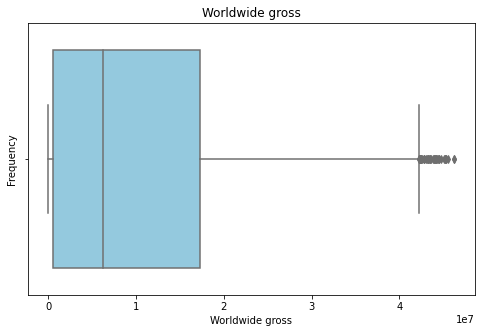

In [297]:
# worldwide gross boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=tn['worldwide_gross'], color='skyblue')
plt.title('Worldwide gross')
plt.xlabel('Worldwide gross')
plt.ylabel('Frequency')
plt.show();

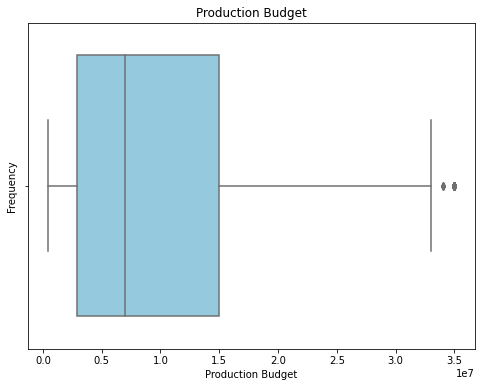

In [298]:
# production budget boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=tn['production_budget'], color='skyblue')
plt.title('Production Budget')
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.show();

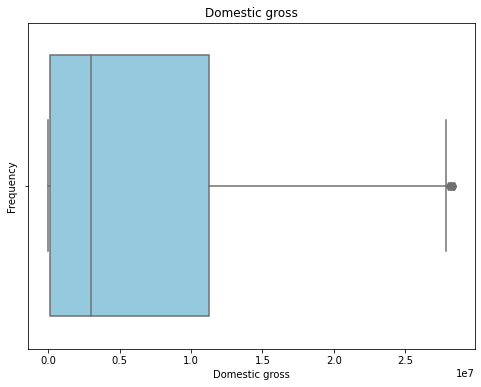

In [299]:
# Domestic gross boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=tn['domestic_gross'], color='skyblue')
plt.title('Domestic gross')
plt.xlabel('Domestic gross')
plt.ylabel('Frequency')
plt.show();

#### Profits
We do not have profits columns in the dataset, but we can add them through getting difference between gross and production budget.
For domestic profits,"production budget" will be subtracted from "domestic gross".

In [300]:
# Let's add profit columns to understand the profits and loses of the business
tn["domestic_profits"] = tn["domestic_gross"] - tn["production_budget"]
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
1696,97,1980-12-05,Flash Gordon,35000000.0,27107960.0,27107960.0,-7892040.0,-7892040.0
1698,99,1999-02-12,Blast from the Past,35000000.0,26613620.0,26613620.0,-8386380.0,-8386380.0
1699,100,2012-10-19,Alex Cross,35000000.0,25888412.0,35426759.0,-9111588.0,426759.0
1700,1,2004-03-26,Jersey Girl,35000000.0,25266129.0,37066129.0,-9733871.0,2066129.0
1701,2,1997-11-21,Midnight in the Garden of Good and Evil,35000000.0,25078937.0,25078937.0,-9921063.0,-9921063.0


From the available features "worldwide gross" and "production budget" we can create a worldwide profits by getting difference of the two features

In [301]:
tn["worldwide_profits"] = tn["worldwide_gross"] - tn["production_budget"]
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits
1696,97,1980-12-05,Flash Gordon,35000000.0,27107960.0,27107960.0,-7892040.0,-7892040.0
1698,99,1999-02-12,Blast from the Past,35000000.0,26613620.0,26613620.0,-8386380.0,-8386380.0
1699,100,2012-10-19,Alex Cross,35000000.0,25888412.0,35426759.0,-9111588.0,426759.0
1700,1,2004-03-26,Jersey Girl,35000000.0,25266129.0,37066129.0,-9733871.0,2066129.0
1701,2,1997-11-21,Midnight in the Garden of Good and Evil,35000000.0,25078937.0,25078937.0,-9921063.0,-9921063.0


From the release date, we create a column "year" which will be used to plot profits and costs over the years

In [302]:
tn["year"] = tn["release_date"].dt.year
tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_profits,worldwide_profits,year
1696,97,1980-12-05,Flash Gordon,35000000.0,27107960.0,27107960.0,-7892040.0,-7892040.0,1980
1698,99,1999-02-12,Blast from the Past,35000000.0,26613620.0,26613620.0,-8386380.0,-8386380.0,1999
1699,100,2012-10-19,Alex Cross,35000000.0,25888412.0,35426759.0,-9111588.0,426759.0,2012
1700,1,2004-03-26,Jersey Girl,35000000.0,25266129.0,37066129.0,-9733871.0,2066129.0,2004
1701,2,1997-11-21,Midnight in the Garden of Good and Evil,35000000.0,25078937.0,25078937.0,-9921063.0,-9921063.0,1997


Does Production Cost affect gross and Profits in both domestic and worldwide markets?


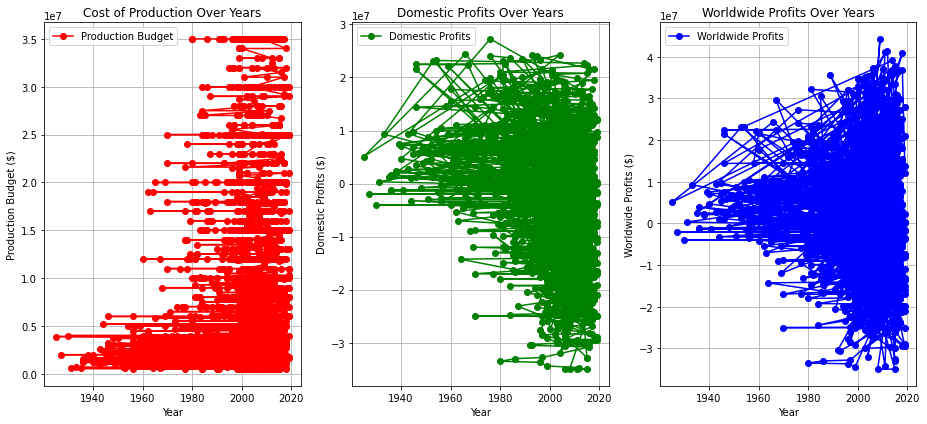

In [303]:
fig, (ax2, ax3, ax1) = plt.subplots(1, 3, figsize=(13, 6))

# Plot Production Budget
ax2.plot(tn["year"], tn["production_budget"], marker='o', color='r', label="Production Budget")
ax2.set_xlabel("Year")
ax2.set_ylabel("Production Budget ($)")
ax2.set_title("Cost of Production Over Years")
ax2.grid(True)
ax2.legend()

# Plot Worldwide Profits
ax1.plot(tn["year"], tn["worldwide_profits"], marker='o', color='b', label="Worldwide Profits")
ax1.set_xlabel("Year")
ax1.set_ylabel("Worldwide Profits ($)")
ax1.set_title("Worldwide Profits Over Years")
ax1.grid(True)
ax1.legend()

# Plot Domestic Profits
ax3.plot(tn["year"], tn["domestic_profits"], marker='o', color='g', label="Domestic Profits")
ax3.set_xlabel("Year")
ax3.set_ylabel("Domestic Profits ($)")
ax3.set_title("Domestic Profits Over Years")
ax3.grid(True)
ax3.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show();

From 1900's to 2000's, there has been consistent increase in production budget, as well as the amount of movies sold in a year. From the plots above, we can conclude that increase in cost of production equals increase in both domestic and worldwide gross, but the same is not true when dealing with profits. 
Increase in Production Budget equals increase in both profits and loses in both domestic and worldwide markets.


## Recommendation
The cost of production and the frequency of movie releases significantly impact both domestic and worldwide gross earnings. This dynamic presents a high-risk, high-reward scenario for Microsoft in the movie industry. While investing heavily in movie production offers the potential for substantial profits, it also entails the risk of significant losses. 

Therefore, Microsoft must carefully balance its investment in movie production, considering the potential rewards against the associated risks. By strategically managing production costs and optimizing the number of movies released annually, Microsoft can maximize its chances of success while mitigating the possibility of financial setbacks. This approach acknowledges the inherent uncertainties of the movie business while positioning Microsoft to capitalize on lucrative opportunities in the ever-evolving entertainment landscape.

# The Movie DB
The movie DB's dataset provides popularity features like how popular a movie is and how many votes the movie got. It also shows the original language of the movies.

## Goal
Analysis to get how and why movies get so popular
Analysis to find which original movie language sells the highest.

## Objectives
Create a function to import data and clean it.

Find out which movie language sells the highest.

Check if votes affect popularity

In [343]:
def cleaning_3(file):
    
# read the moviedb csv
    df = pd.read_csv(file)

# changing "release_date" from obj to datetime type
    df["release_date"] = pd.to_datetime(df["release_date"])
    
# removing outliers from the numerical features
# popularity
    pl, ph = df["popularity"].quantile([0.05, 0.65])
    p_out = df["popularity"].between(pl, ph)
    
# average vote
    a_low, a_high = df["vote_average"].quantile([0.3, 0.8])
    a_outlier = df["vote_average"].between(a_low, a_high)
    
# vote count
    v_low, v_high = df["vote_count"].quantile([0.005, 0.65])
    v_outlier = df["vote_count"].between(v_low, v_high)

# put them together
    df = df[p_out]
    df = (df.loc[a_outlier])
    df = (df.loc[v_outlier])
    
# add a column "year" from release_date
    df["year"] = df["release_date"].dt.year
    
# return the cleaned dataset
    return df

In [344]:
tmdb = cleaning_3("data/tmdb.movies.csv")
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year
784,784,"[28, 12, 18, 53]",32005,en,Breaking Point,2.225,2009-12-04,Breaking Point,5.6,8,2009
785,785,[35],45920,en,Ollie Klublershturf vs. the Nazis,2.222,2010-09-14,Ollie Klublershturf vs. the Nazis,5.9,7,2010
789,789,"[10752, 18]",57602,fr,Un homme qui crie,2.211,2010-09-28,A Screaming Man,6.1,10,2010
794,794,[35],63160,en,Successful Alcoholics,2.203,2010-01-22,Successful Alcoholics,6.1,7,2010
795,795,[99],62325,en,Bhutto,2.198,2010-12-03,Bhutto,5.4,6,2010


In [345]:
# before cleaning, the dataset contains:
# 26517 records and 10 feature(3 integers, 5 objects, and 2 floating values)
# no null value(this is good),
# release_date is an object

tmdb.info()
# after cleaning, the dataset contains:
# release_date is in datetime data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6424 entries, 784 to 26438
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         6424 non-null   int64         
 1   genre_ids          6424 non-null   object        
 2   id                 6424 non-null   int64         
 3   original_language  6424 non-null   object        
 4   original_title     6424 non-null   object        
 5   popularity         6424 non-null   float64       
 6   release_date       6424 non-null   datetime64[ns]
 7   title              6424 non-null   object        
 8   vote_average       6424 non-null   float64       
 9   vote_count         6424 non-null   int64         
 10  year               6424 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 602.2+ KB


In [346]:
tmdb[["popularity", "vote_average", "vote_count"]].describe()

,popularity,vote_average,vote_count
count,6424.000000,6424.000000,6424.000000
mean,0.956754,6.283188,3.835928
std,0.451099,0.595280,3.148488
min,0.600000,5.200000,1.000000
25%,0.600000,6.000000,1.000000
50%,0.711000,6.200000,3.000000
75%,1.257000,7.000000,5.000000
max,2.235000,7.300000,13.000000


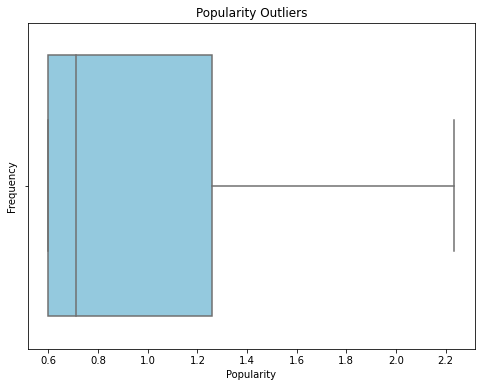

In [347]:
# box plot for popularity
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['popularity'], color='skyblue')
plt.title('Popularity Outliers')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show();

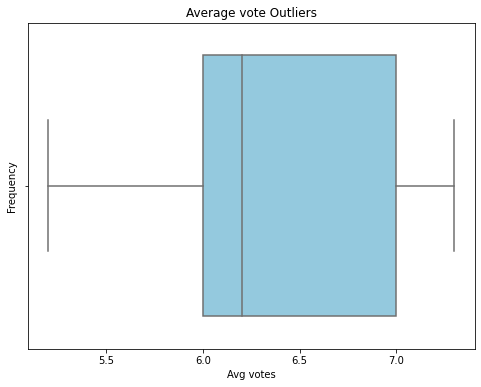

In [348]:
# box plot for average votes
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['vote_average'], color='skyblue')
plt.title('Average vote Outliers')
plt.xlabel('Avg votes')
plt.ylabel('Frequency')
plt.show();

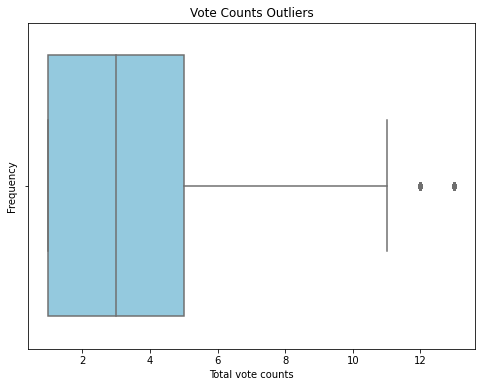

In [349]:
# box plot for vote counts
plt.figure(figsize=(8, 6))
sns.boxplot(x=tmdb['vote_count'], color='skyblue')
plt.title('Vote Counts Outliers')
plt.xlabel('Total vote counts')
plt.ylabel('Frequency')
plt.show();

From the Movie DB, which language sells the most?

In [350]:
# lets check how many movies per original language
tmdb["original_language"].value_counts()

en    5677
es     131
fr      85
ru      70
de      62
ja      48
zh      33
it      32
hi      21
ko      18
pt      17
th      16
pl      16
da      14
he      13
xx      13
cn      13
nl      11
no      11
te      10
sv       9
tl       8
ar       8
fa       8
hu       7
el       7
fi       7
ro       5
bn       4
vi       3
lv       3
cs       3
mr       3
ab       3
lt       2
pa       2
bg       2
ur       2
sn       2
is       2
hr       2
id       2
lo       2
kn       2
sr       2
ta       1
eu       1
uk       1
ka       1
tr       1
cr       1
ha       1
ps       1
sq       1
bs       1
ml       1
et       1
gu       1
Name: original_language, dtype: int64

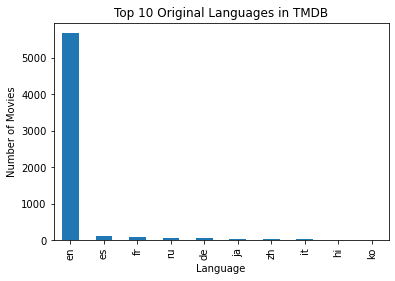

In [351]:
language_counts = tmdb["original_language"].value_counts()
top_languages = language_counts.head(10)

top_languages.plot(kind='bar')
plt.title('Top 10 Original Languages in TMDB')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.show();

## Recommendation
To maximize profits, Microsoft has to produce a lot of English movies than any other language to avoid loses.

Does Movie count affect popularity? Does vote count also affect popularity?

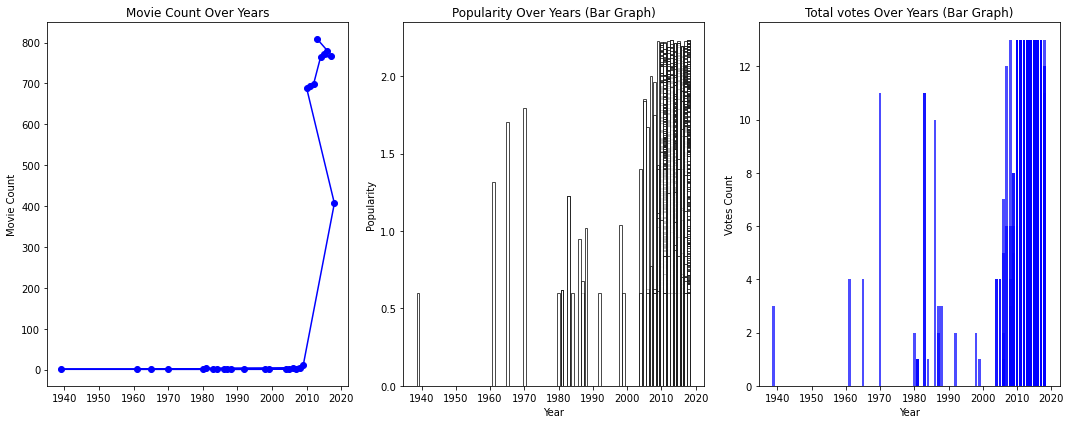

In [355]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

# Plot the line graph for the count of movies per year
tmdb["year"].value_counts().plot(kind='line', marker='o', linestyle='-', color='b', ax=ax1)
ax1.set_title('Movie Count Over Years')
ax1.set_ylabel('Movie Count')

# Plot the bar graph for popularity over years
ax2.bar(tmdb['year'], tmdb['popularity'], color='w', edgecolor="black", alpha=0.7)
ax2.set_title('Popularity Over Years (Bar Graph)')
ax2.set_xlabel('Year')
ax2.set_ylabel('Popularity')

# Plot the bar graph for average votes over years
ax3.bar(tmdb['year'], tmdb['vote_count'], color='b', alpha=0.7)
ax3.set_title('Total votes Over Years (Bar Graph)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Votes Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show();

# So it possible to conclude that the movies are released in The MovieDB, the more popular The movieDB gets

In [356]:
tmdb["vote_count"].corr(tmdb["popularity"])

0.549394219698477

## Recommendation
Microsoft should deliver more movies in a year to gain popularity. More movies equals more votes which makes Microsoft more popular.

## The Movie DB - Conclusion 
Microsoft can boost its popularity by increasing the number of movies it releases each year. More movies mean more chances for people to watch and enjoy Microsoft's content, leading to greater recognition and support. Additionally, to maximize profits, Microsoft should focus primarily on producing English-language movies. This strategic approach helps mitigate potential losses and ensures a wider audience reach, as English movies tend to have broader international appeal. By aligning their production strategy with audience preferences and market dynamics, Microsoft can enhance both its popularity and profitability in the movie industry.

# Conclusion
Microsoft's success in the movie industry could be boosted by prioritizing international releases over domestic ones. There's a big opportunity to make more money by selling movies to audiences worldwide.

Also, teaming up with the top-performing studios, both in the U.S. and abroad, could be a smart move. By partnering with them, Microsoft can tap into their expertise and connections, helping them do better both locally and internationally.

Microsoft needs to focus separately on selling movies globally and locally because these markets work independently.

The cost of making movies and how often they come out really affect how much money Microsoft makes, both at home and around the world. It's kind of like a gamble – spending a lot on making movies could bring in big profits, but it could also mean losing a lot of money.

So, Microsoft has to be smart about how much they spend on making movies and how often they release them. By thinking carefully about the potential rewards and risks, they can increase their chances of doing well while also avoiding big financial problems. This approach understands that making movies is tricky, but it puts Microsoft in a good position to take advantage of opportunities in the movie world.

Also, to make the most money, Microsoft should focus more on making movies in English because they're more popular worldwide. And if Microsoft releases more movies in a year, it could make them more famous and liked/voted by people.

By thinking about all these things – like where to focus their sales, how much to spend on making movies, and how often to release them – Microsoft can do better in the movie business and become a big name in entertainment.